In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

In [ ]:
# Load Mortality Dataset
mortality_datatset = pd.read_csv('/content/cleaned_2016-2023-imi-results-long-view.csv')
dataset_start_year = 2016
dataset_end_year = 2023

mortality_datatset.describe()

,YEAR,# of Deaths,# of Cases
count,365.000000,365.000000,365.000000
mean,2018.849315,750.408219,15219.709589
std,1.930604,1640.673599,33592.503271
min,2016.000000,0.000000,14.000000
25%,2017.000000,26.000000,732.000000
50%,2019.000000,160.000000,4044.000000
75%,2020.000000,777.000000,15702.000000
max,2022.000000,13858.000000,259784.000000


In [ ]:
# Load Mortality Dataset
mortality_datatset = pd.read_csv('/content/cleaned_2016-2023-imi-results-long-view.csv')

# Specify the directory name
directory_name = "mortality_datatset"

previous_year_value_lists = []

previous_year_value_list = []

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")


# Drop the # of Cases column
mortality_datatset.drop(columns=['# of Cases'], inplace=True)

# 2019 Law - Medi-Cal expansions for all income-eligible young adults, regardless of immigration status
law_start_year = 2019

# Adding D (Intervention) column values for each row as the law was introduced in 2019
for index, row in mortality_datatset.iterrows():
  if (row['YEAR'] >= law_start_year):
    mortality_datatset.at[index, 'D'] = 1
  else:
    mortality_datatset.at[index, 'D'] = 0


# Renaming column # of Deaths to Y
mortality_datatset.rename(columns={'# of Deaths': 'Y'}, inplace=True)

# Seperate main csv file into csv files for each county
for county, group in mortality_datatset.groupby(['COUNTY']):
  # Remove County column
  group.drop(columns=['COUNTY'], inplace=True)

  # Remove Year column
  group.drop(columns=['YEAR'], inplace=True)

  # Adding T (Year) column values for each row
  group.insert(0, 'T', range(1, group['D'].size + 1))

  intervention_year_index = 1
  previous_year_set = False
  prev_row = None

  # Adding P (Intervention Year) column values for each row
  for index, row in group.iterrows():
    if (row['D'] == 1):
      group.at[index, 'P'] = intervention_year_index
      intervention_year_index += 1

      if group.iloc[0]["D"] != 1.0 and not previous_year_set and prev_row is not None:
        previous_year_value_list.append(prev_row["Y"])
        previous_year_set = True
    else:
      group.at[index, 'P'] = 0

    prev_row = row



  group.to_csv(f'{directory_name}/{county[0]}.csv', index=False)

previous_year_value_lists.append(previous_year_value_list)

Directory 'mortality_datatset' created successfully.


In [ ]:
!!# Load Infant Mortality Dataset
infant_mortality_datatset = pd.read_csv('/content/cleaned_data-infant-mortality.csv')
dataset_start_year = 2007
dataset_end_year = 2021

infant_mortality_datatset.describe()

,Numerator,Denominator
count,1678.000000,1.678000e+03
mean,2539.182956,6.585289e+05
std,12508.617775,3.244864e+06
min,0.000000,0.000000e+00
25%,0.000000,1.670250e+03
50%,26.000000,1.410350e+04
75%,459.000000,1.584890e+05
max,154033.000000,3.601053e+07


In [ ]:
# Load Infant Mortality Dataset
infant_mortality_datatset = pd.read_csv('/content/cleaned_data-infant-mortality.csv')

# Specify the directory name
directory_name = "infant_mortality_datatset"

previous_year_value_list = []

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")


# Drop the Denominator
infant_mortality_datatset.drop(columns=['Denominator'], inplace=True)

infant_mortality_datatset = infant_mortality_datatset[~(infant_mortality_datatset['Year'].str.contains("-"))]

# 2019 Law - Medi-Cal expansions for all income-eligible young adults, regardless of immigration status
law_start_year = 2019

# Adding D (Intervention) column values for each row as the law was introduced in 2019
for index, row in infant_mortality_datatset.iterrows():
  if (int(row['Year']) >= law_start_year):
    infant_mortality_datatset.at[index, 'D'] = 1
  elif (int(row['Year']) == (law_start_year - 1)):
    previous_year_value_list.append(row["Numerator"])
    infant_mortality_datatset.at[index, 'D'] = 0
  else:
    infant_mortality_datatset.at[index, 'D'] = 0

# Renaming column # of Deaths to Y
infant_mortality_datatset.rename(columns={'Numerator': 'Y'}, inplace=True)

# Seperate main csv file into csv files for each county
for county, group in infant_mortality_datatset.groupby(['Geography']):
  # Remove County column
  group.drop(columns=['Geography'], inplace=True)

  # Remove Year column
  group.drop(columns=['Year'], inplace=True)

  # Adding T (Year) column values for each row
  group.insert(0, 'T', range(1, group['D'].size + 1))

  intervention_year_index = 1
  previous_year_set = False
  prev_row = None

  # Adding P (Intervention Year) column values for each row
  for index, row in group.iterrows():
    if (row['D'] == 1):
      group.at[index, 'P'] = intervention_year_index
      intervention_year_index += 1

      if group.iloc[0]["D"] != 1.0 and not previous_year_set and prev_row is not None:
        previous_year_value_list.append(prev_row["Y"])
        previous_year_set = True

    else:
      group.at[index, 'P'] = 0

    prev_row = row

  group.to_csv(f'{directory_name}/{county[0]}.csv', index=False)

previous_year_value_lists.append(previous_year_value_list)

Directory 'infant_mortality_datatset' created successfully.


In [ ]:
# Load cohs Dataset
cohs_dataset = pd.read_csv('/content/cleaned_4.7-cohs-plans-q4-2024-odp.csv')
dataset_start_year = 2016
dataset_end_year = 2024

cohs_dataset.describe()

,Year,Number of Eligible Individuals
count,61.000000,61.000000
mean,2020.213115,7301.180328
std,2.595604,6963.235547
min,2016.000000,18.000000
25%,2018.000000,3423.000000
50%,2020.000000,4471.000000
75%,2022.000000,9883.000000
max,2024.000000,30986.000000


In [ ]:
# Load cohs Dataset
cohs_dataset = pd.read_csv('/content/cleaned_4.7-cohs-plans-q4-2024-odp.csv')

# Specify the directory name
directory_name = "cohs_dataset"

previous_year_value_list = []

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")


# 2019 Law - Medi-Cal expansions for all income-eligible young adults, regardless of immigration status
law_start_year = 2019

# Adding D (Intervention) column values for each row as the law was introduced in 2019
for index, row in cohs_dataset.iterrows():
  if (int(row['Year']) >= law_start_year):
    cohs_dataset.at[index, 'D'] = 1
  else:
    cohs_dataset.at[index, 'D'] = 0

# Renaming column # of Deaths to Y
cohs_dataset.rename(columns={' Number of Eligible Individuals ': 'Y'}, inplace=True)

# Seperate main csv file into csv files for each county
for county, group in cohs_dataset.groupby(['County Organized Health System (COHS) Health Plan']):
  # Remove County column
  group.drop(columns=['County Organized Health System (COHS) Health Plan'], inplace=True)

  # Remove Year column
  group.drop(columns=['Year'], inplace=True)

  # Adding T (Year) column values for each row
  group.insert(0, 'T', range(1, group['D'].size + 1))

  intervention_year_index = 1
  previous_year_set = False
  prev_row = None

  # Adding P (Intervention Year) column values for each row
  for index, row in group.iterrows():
    if (row['D'] == 1):
      group.at[index, 'P'] = intervention_year_index
      intervention_year_index += 1

      if group.iloc[0]["D"] != 1.0 and not previous_year_set and prev_row is not None:
        previous_year_value_list.append(prev_row["Y"])
        previous_year_set = True

    else:
      group.at[index, 'P'] = 0

    prev_row = row

  if group.iloc[0]["D"] != 1.0:
    group.to_csv(f'{directory_name}/{county[0]}.csv', index=False)

previous_year_value_lists.append(previous_year_value_list)

Directory 'cohs_dataset' created successfully.


In [ ]:
law_name = "2019_medi_cal_expansions"

paths = ["mortality_datatset", "infant_mortality_datatset", "cohs_dataset"]
dataset_names = ["mortality", "infant_mortality", "cohs"]
dataset_base_directories = []

for path, dataset_name in zip(paths, dataset_names):
  # Specify the directory name
  directory_name_base = dataset_name + "_" + law_name
  dataset_base_directories.append(directory_name_base)

  # Create the directory
  try:
      os.mkdir(directory_name_base)
      print(f"Directory '{directory_name_base}' created successfully.")
  except FileExistsError:
      print(f"Directory '{directory_name_base}' already exists.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{directory_name_base}'.")
  except Exception as e:
      print(f"An error occurred: {e}")

  # Specify the directory name
  directory_name = directory_name_base + "/datasets"

  # Create the directory
  try:
      os.mkdir(directory_name)
      print(f"Directory '{directory_name}' created successfully.")
  except FileExistsError:
      print(f"Directory '{directory_name}' already exists.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{directory_name}'.")
  except Exception as e:
      print(f"An error occurred: {e}")

  # Specify the directory name
  directory_name = directory_name_base + "/charts"

  # Create the directory
  try:
      os.mkdir(directory_name)
      print(f"Directory '{directory_name}' created successfully.")
  except FileExistsError:
      print(f"Directory '{directory_name}' already exists.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{directory_name}'.")
  except Exception as e:
      print(f"An error occurred: {e}")

  # Specify the directory name
  directory_name = directory_name_base + "/final_datasets"

  # Create the directory
  try:
      os.mkdir(directory_name)
      print(f"Directory '{directory_name}' created successfully.")
  except FileExistsError:
      print(f"Directory '{directory_name}' already exists.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{directory_name}'.")
  except Exception as e:
      print(f"An error occurred: {e}")

  # Specify the directory name
  directory_name = directory_name_base + "/final_json_datasets"

  # Create the directory
  try:
      os.mkdir(directory_name)
      print(f"Directory '{directory_name}' created successfully.")
  except FileExistsError:
      print(f"Directory '{directory_name}' already exists.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{directory_name}'.")
  except Exception as e:
      print(f"An error occurred: {e}")

Directory 'mortality_2019_medi_cal_expansions' created successfully.
Directory 'mortality_2019_medi_cal_expansions/datasets' created successfully.
Directory 'mortality_2019_medi_cal_expansions/charts' created successfully.
Directory 'mortality_2019_medi_cal_expansions/final_datasets' created successfully.
Directory 'mortality_2019_medi_cal_expansions/final_json_datasets' created successfully.
Directory 'infant_mortality_2019_medi_cal_expansions' created successfully.
Directory 'infant_mortality_2019_medi_cal_expansions/datasets' created successfully.
Directory 'infant_mortality_2019_medi_cal_expansions/charts' created successfully.
Directory 'infant_mortality_2019_medi_cal_expansions/final_datasets' created successfully.
Directory 'infant_mortality_2019_medi_cal_expansions/final_json_datasets' created successfully.
Directory 'cohs_2019_medi_cal_expansions' created successfully.
Directory 'cohs_2019_medi_cal_expansions/datasets' created successfully.
Directory 'cohs_2019_medi_cal_expans

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import scipy as sp
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', UserWarning)

mortality_2019_medi_cal_expansions
Tuolumne
                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                    6
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.146
Date:                Wed, 23 Jul 2025   AIC                             52.291
Time:                        11:39:08   BIC                             51.042
Sample:                             0   HQIC                            47.290
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.7977   2.64e+05      0.000      1.000   -5.18e+05    5.18e+05
T            -26.4689   9.95e+04     -0.000      1.000   -1.95e+05    1.95e+05
D       

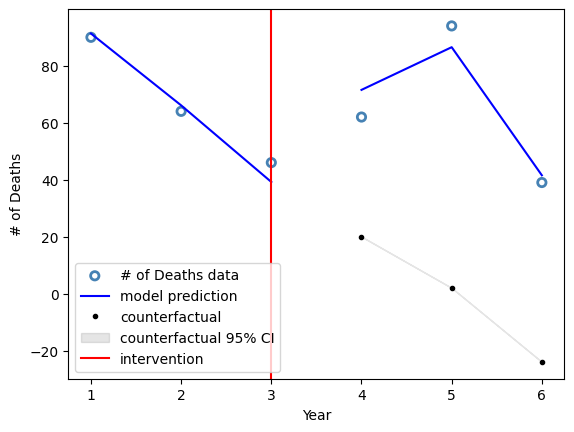

infant_mortality_2019_medi_cal_expansions
Tuolumne
                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                   15
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 158.910
Date:                Wed, 23 Jul 2025   AIC                           -305.820
Time:                        11:39:39   BIC                           -301.571
Sample:                             0   HQIC                          -305.865
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0         -0        nan        nan           0           0
T                   0         -0        nan        nan           0           0
D

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1431: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


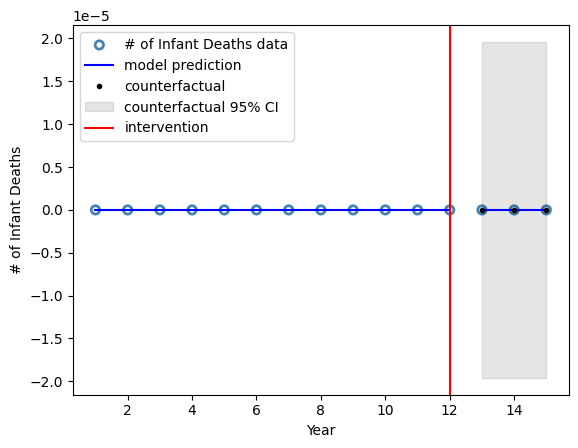

cohs_2019_medi_cal_expansions
Santa Barbara
                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                    9
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -67.805
Date:                Wed, 23 Jul 2025   AIC                            147.611
Time:                        11:40:00   BIC                            148.794
Sample:                             0   HQIC                           145.057
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3952.6602   1138.485      3.472      0.001    1721.271    6184.050
T            289.7785    901.589      0.321      0.748   -1477.303    2056.860
D       

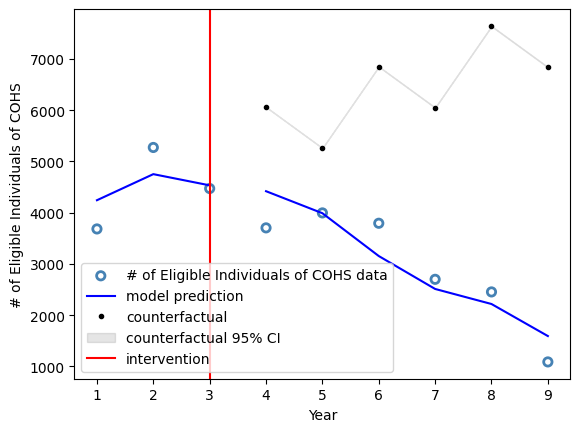

In [ ]:
data_types = ["# of Deaths", "# of Infant Deaths", "# of Eligible Individuals of COHS"]
output_dfs_lists = []
df_names_lists = []
final_dfs_lists = []

dataset_counter = 0

for path, data_type, dataset_base_directory in zip(paths, data_types, dataset_base_directories):
  output_dfs_list = []
  dfs_list = []
  df_names_list = []
  final_dfs_list = []

  for f in os.listdir("/content/" + path):
    if f.endswith('.csv'):
      dfs_list.append(pd.read_csv(f'{path}/{f}'))
      df_names_list.append(f.removesuffix(".csv"))

  first = True
  dataframe_counter = 0

  for df in dfs_list:
    exog_data = df[["T","D","P"]]
    for col in exog_data.columns:
      if (exog_data[col] == exog_data[col].iloc[0]).all():
          print(f"Column '{col}' is constant.")
          print("path " + path)
          print(df)

    arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(1,0,0)).fit()

    start = -1
    end = -1

    for index, row in df.iterrows():
      if row["D"] == 1 and start == -1:
        start = index

    end = df.shape[0]

    predictions = arima_results.get_prediction(0, end-1)
    summary = predictions.summary_frame(alpha=0.05)

    arima_cf = ARIMA(df["Y"][:start], df["T"][:start], order=(1,0,0)).fit()

    # Model predictions means
    y_pred = predictions.predicted_mean

    # Counterfactual mean and 95% confidence interval
    y_cf = arima_cf.get_forecast(end - start, exog=df["T"][start:]).summary_frame(alpha=0.05)

    # Plot section
    fig, ax = plt.subplots()

    # Plot bounce rate data
    ax.scatter(df["T"], df["Y"], facecolors='none', edgecolors='steelblue', label=(data_type + " data"), linewidths=2)

    # Plot model mean bounce prediction
    ax.plot(df["T"][:start], y_pred[:start], 'b-', label="model prediction")
    ax.plot(df["T"][start:], y_pred[start:], 'b-')

    # Plot counterfactual mean bounce rate with 95% confidence interval
    ax.plot(df["T"][start:], y_cf["mean"], 'k.', label="counterfactual")
    ax.fill_between(df["T"][start:], y_cf['mean_ci_lower'], y_cf['mean_ci_upper'], color='k', alpha=0.1, label="counterfactual 95% CI")


    # Plot line marking intervention moment
    ax.axvline(x = start, color = 'r', label = 'intervention')

    ax.legend(loc='best')
    plt.ylim()
    plt.xlabel("Year")
    plt.ylabel(data_type)

    if first:
      print(dataset_base_directory)
      print(df_names_list[0])
      print(arima_results.summary())
      plt.show()
      first = False

    plt.savefig(f'{dataset_base_directory}/charts/{df_names_list[dataframe_counter]}.png')
    plt.close()

    predictions_dataset = y_pred[start:]

    output_dfs_list.append(predictions_dataset.to_frame())
    predictions_dataset.to_csv(f'{dataset_base_directory}/datasets/{df_names_list[dataframe_counter]}.csv', index=False)



    predictions_dataset = predictions_dataset.to_frame()

    predictions_dataset.loc[-1] = previous_year_value_lists[dataset_counter][dataframe_counter]
    predictions_dataset.sort_index(inplace=True)

    predictions_dataset.insert(0, 'Years', range(law_start_year - 1, law_start_year + predictions_dataset['predicted_mean'].size - 1))

    final_dfs_list.append(predictions_dataset)

    dataframe_counter += 1

  output_dfs_lists.append(output_dfs_list)
  df_names_lists.append(df_names_list)
  final_dfs_lists.append(final_dfs_list)

  dataset_counter += 1

In [ ]:
%%capture

for dataset_base_directory in dataset_base_directories:
  !zip -r /content/{dataset_base_directory}/zipped_data /content/{dataset_base_directory}/datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import json

sns.set_style(
    style='darkgrid',
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [ ]:
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

In [ ]:
k0 = WhiteKernel(noise_level=0.3**2, noise_level_bounds=(0.1**2, 0.5**2))

k1 = ConstantKernel(constant_value=2) * \
  ExpSineSquared(length_scale=1.0, periodicity=40, periodicity_bounds=(35, 45))

kernel_1  = k0 + k1

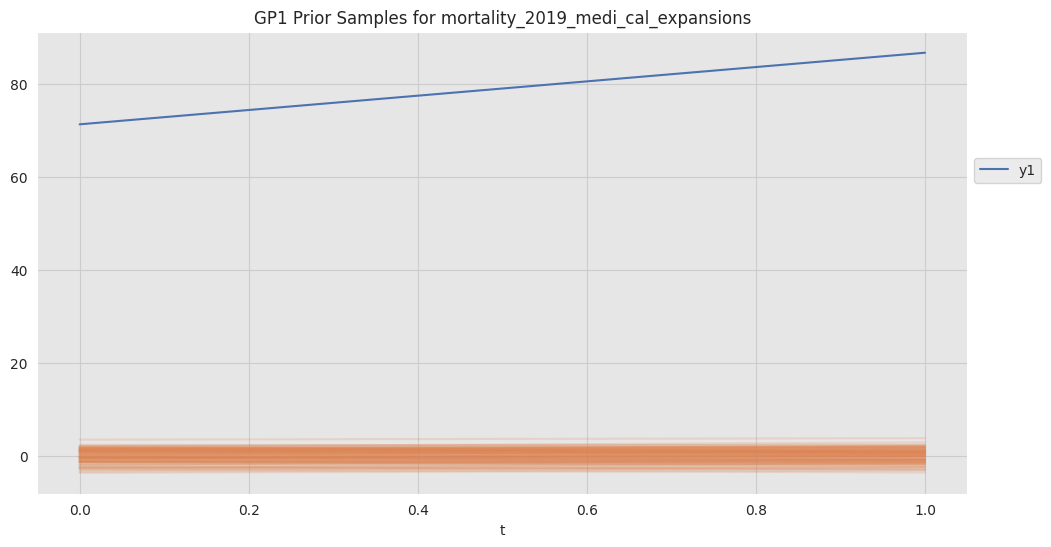

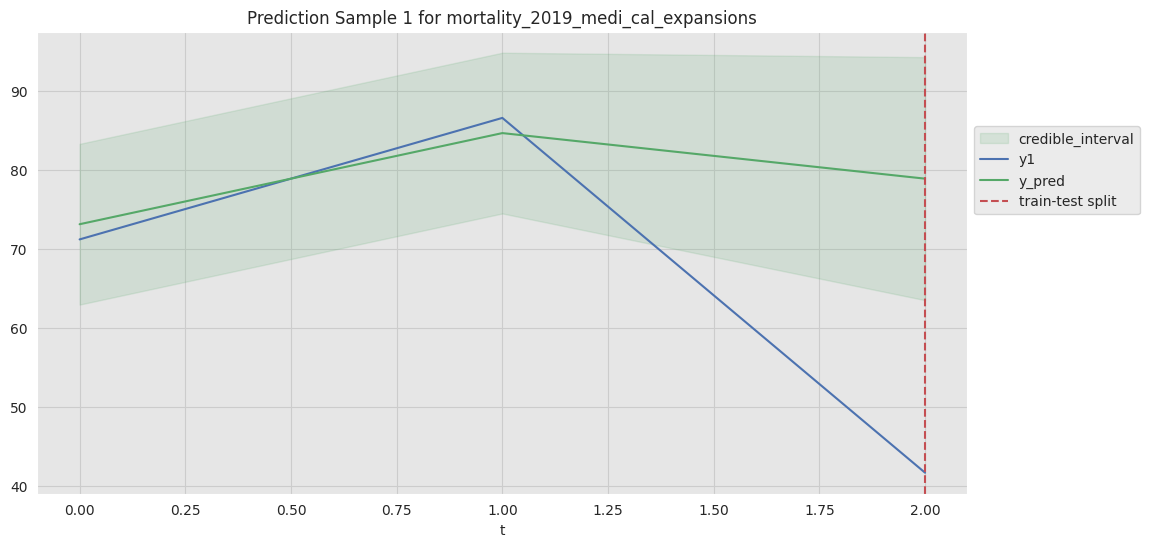

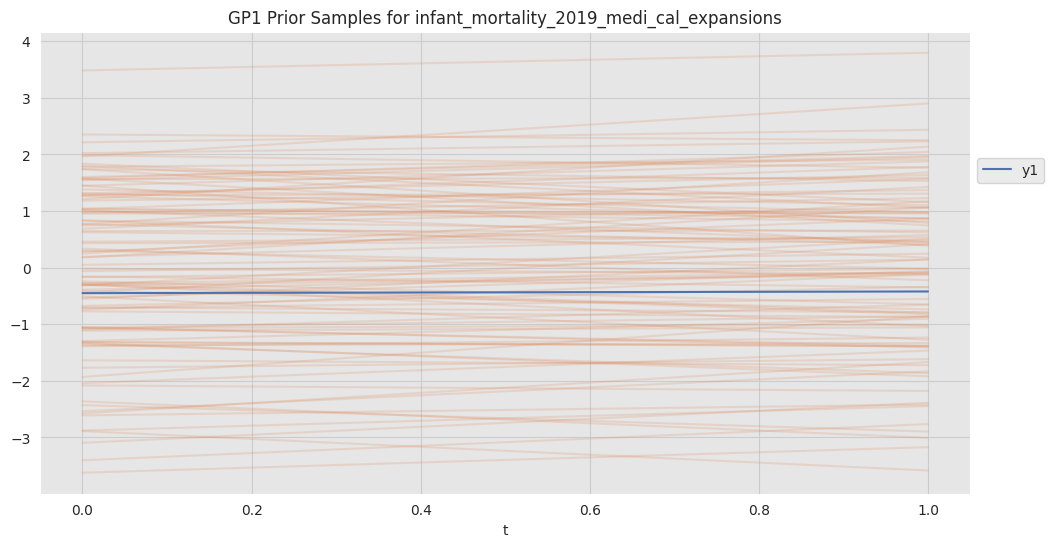

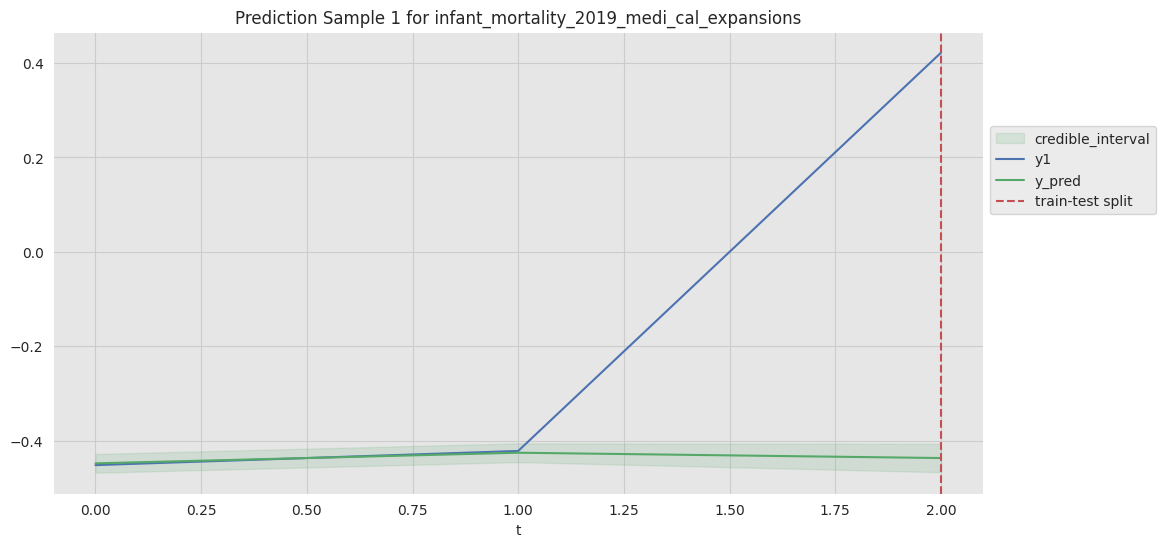

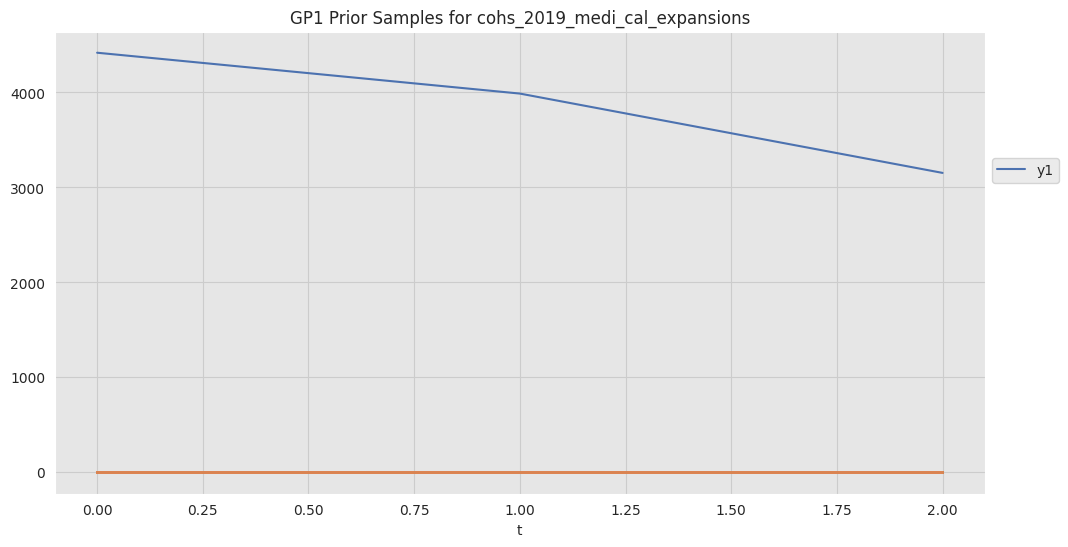

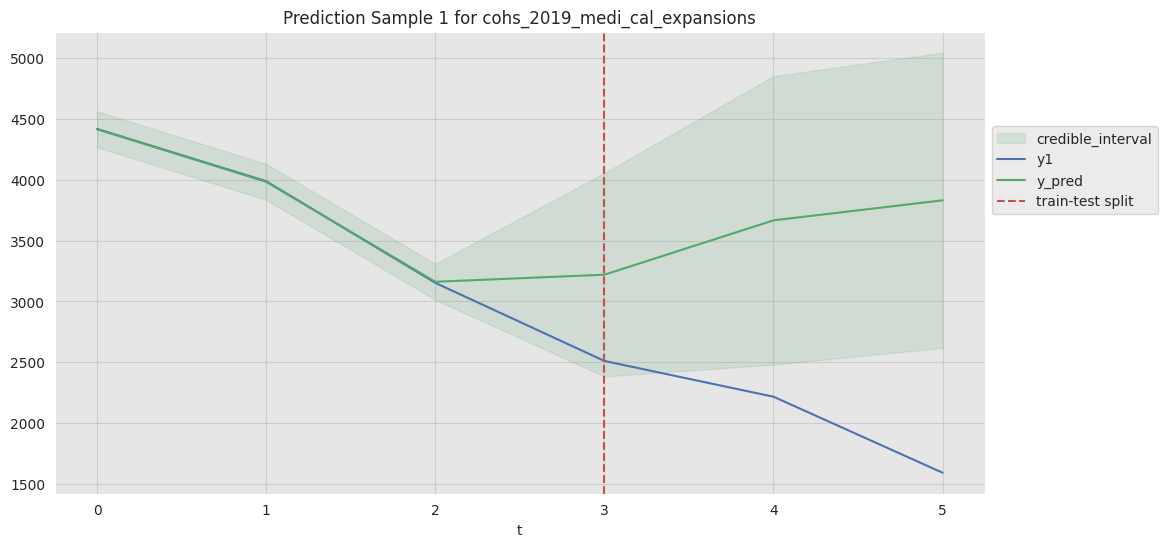

In [ ]:
dataset_counter = 0

for dataset_base_directory, output_dfs_list in zip(dataset_base_directories, output_dfs_lists):
  dataframe_counter = 0

  gp1 = GaussianProcessRegressor(
      kernel=kernel_1,
      n_restarts_optimizer=10,
      normalize_y=True,
      alpha=0.0
  )

  for dataframe_counter in range(len(df_names_lists[dataset_counter])):
    data_df = output_dfs_lists[dataset_counter][dataframe_counter]
    final_dfs = final_dfs_lists[dataset_counter][dataframe_counter]
    df_name = df_names_lists[dataset_counter][dataframe_counter]

    data_df.rename(columns={'predicted_mean': 's1'}, inplace=True)

    # Define target variable.
    data_df['y1'] = data_df['s1']

    # Set noise standard deviation.
    sigma_n = 0.3

    n = data_df.shape[0]

    data_df['epsilon'] = np.random.normal(loc=0, scale=sigma_n, size=n)

    # Add noise to target variable.
    data_df ['y1'] = data_df ['y1'] + data_df ['epsilon']

    if 't' not in data_df.columns:
      data_df.insert(0, 't', range(0, data_df['y1'].size))

    data_df.reset_index(drop=True, inplace=True)

    X = data_df['t'].values.reshape(n, 1)
    y = data_df['y1'].values.reshape(n, 1)

    prop_train = 0.5
    n_train = round(prop_train * n)

    X_train = X[:n_train]
    y_train = y[:n_train]

    X_test = X[n_train:]
    y_test = y[n_train:]

    gp1_prior_samples = gp1.sample_y(X=X_train, n_samples=100)

    if dataframe_counter == 0:
      fig, ax = plt.subplots()
      for i in range(100):
          sns.lineplot(x=X_train[...,0], y = gp1_prior_samples[:, i], color=sns_c[1], alpha=0.2, ax=ax)
      sns.lineplot(x=X_train[...,0], y=y_train[..., 0], color=sns_c[0], label='y1', ax=ax)
      ax.legend(loc='center left', bbox_to_anchor=(1, 0.7))
      ax.set(title=('GP1 Prior Samples for ' + dataset_base_directory), xlabel='t');

    gp1.fit(X_train, y_train)

    GaussianProcessRegressor(alpha=0.0,
                            kernel=WhiteKernel(noise_level=0.09) + 1.41**2 * ExpSineSquared(length_scale=1, periodicity=40),
                            n_restarts_optimizer=10, normalize_y=True)

    # Generate predictions.
    y_pred, y_std = gp1.predict(X, return_std=True)

    data_df['y_pred'] = y_pred
    data_df['y_std'] = y_std
    data_df['y_pred_lwr'] = data_df['y_pred'] - 2*data_df['y_std']
    data_df['y_pred_upr'] = data_df['y_pred'] + 2*data_df['y_std']

    if dataframe_counter == 0:
      fig, ax = plt.subplots()

      ax.fill_between(
          x=data_df['t'],
          y1=data_df['y_pred_lwr'],
          y2=data_df['y_pred_upr'],
          color=sns_c[2],
          alpha=0.15,
          label='credible_interval'
      )

      sns.lineplot(x='t', y='y1', data=data_df, color=sns_c[0], label = 'y1', ax=ax)
      sns.lineplot(x='t', y='y_pred', data=data_df, color=sns_c[2], label='y_pred', ax=ax)

      ax.axvline(n_train, color=sns_c[3], linestyle='--', label='train-test split')
      ax.legend(loc='center left', bbox_to_anchor=(1, 0.7))
      ax.set(title=('Prediction Sample 1 for ' + dataset_base_directory), xlabel='t', ylabel='');

    num_of_predictions = 10
    X_predictions = []

    for i in range(num_of_predictions):
      X_predictions.append([i + 1])


    y_pred, y_std = gp1.predict(X_predictions, return_std=True)

    current_year = dataset_end_year
    new_df = pd.DataFrame()

    for i in range(num_of_predictions):
      new_df = pd.concat([new_df, (pd.DataFrame({'Years': [current_year], 'predicted_mean': [y_pred[i]]}))])
      current_year += 1

    df = pd.concat([final_dfs, new_df])
    df['% Change'] = df['predicted_mean'].pct_change() * 100

    df.to_csv(f'{dataset_base_directory}/final_datasets/{df_name}.csv', index=False)

    json_str = df.to_json(orient='records')
    json_str = {f"{df_name}": json.loads(json_str)}
    with open(f'{dataset_base_directory}/final_json_datasets/{df_name}.json', 'w') as f:
      json.dump(json_str, f)

    dataframe_counter += 1

  dataset_counter += 1

In [ ]:
%%capture

for dataset_base_directory in dataset_base_directories:
  !zip -r /content/{dataset_base_directory}/zipped_final_data /content/{dataset_base_directory}/final_datasets
  !zip -r /content/{dataset_base_directory}/zipped_json_final_data /content/{dataset_base_directory}/final_json_datasets

  !zip -r /content/{dataset_base_directory}/zipped_charts /content/{dataset_base_directory}/charts

In [ ]:
def merge_json_files(file_paths, output_file, base_path):
    merged_data = []
    for path in file_paths:
      path = base_path + path + ".json"
      with open(path, 'r') as file:
          data = json.load(file)
          merged_data.append(data)
    with open(output_file, 'w') as outfile:
        json.dump(merged_data, outfile)

file_paths = df_names_lists[0]

output_file = "/content/mortality_2019_medi_cal_expansions/mortality_merged_json_datasets.json"

merge_json_files(file_paths, output_file, "mortality_2019_medi_cal_expansions/final_json_datasets/")

file_paths = df_names_lists[1]

output_file = "/content/infant_mortality_2019_medi_cal_expansions/infant_mortality_merged_json_datasets.json"

merge_json_files(file_paths, output_file, "infant_mortality_2019_medi_cal_expansions/final_json_datasets/")

file_paths = df_names_lists[2]

output_file = "/content/cohs_2019_medi_cal_expansions/cohs_merged_json_datasets.json"

merge_json_files(file_paths, output_file, "cohs_2019_medi_cal_expansions/final_json_datasets/")
